In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Question 1:

#### Algorithm implementing modified QR:

In [23]:
def original_gs(A):
    m,n = A.shape
    Q= np.zeros(shape=(m,n))
    R= np.zeros(shape=(n,n))
    for j in range(n):
        Q[:,j] = A[:,j]
        for i in range(j):
            R[i,j] = np.dot(np.transpose(Q[:,i]),Q[:,j])
            Q[:,j] = Q[:,j]- R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(Q[:,j])
        Q[:,j] = Q[:,j]/R[j,j]

    return Q,R

In [2]:
def modified_gs(A):
    m,n = A.shape
    Q= np.zeros(shape=(m,n))
    R= np.zeros(shape=(n,n))
    for i in range(n):
        Q[:,i] = A[:,i]
    for i in range(n):
        R[i,i]=np.linalg.norm(Q[:,i])
        Q[:,i]=Q[:,i]/R[i,i]
        for j in range(i+1,n):
            R[i,j]=np.dot(np.transpose(Q[:,i]),Q[:,j])
            Q[:,j]=Q[:,j]- R[i,j]*Q[:,i]
    return Q,R

In [29]:
A = np.array([[1,2],[3,4],[5,6]])
print('Condition number for A:',np.linalg.cond(A))
B = np.array([[1,2],[3,4],[500000000,60000000]])
print('Condition number for B:',np.linalg.cond(B))

Condition number for A: 18.521305341258135
Condition number for B: 123803097.31132774


In [37]:
Q, R = original_gs(A)
print(f'Original GS algorithm: \nQ:{Q},\nR:{R}')
Q, R = np.linalg.qr(A)
print(f'Modified GS algorithm: \nQ:{Q},\nR:{R}')
Q, R = np.linalg.qr(A)
print(f'Numpy algorithm: \nQ:{Q},\nR:{R}')
print(f'Matlab algorithm: \nQ:',np.array([[-0.169030850945703,0.897085227145061,0.408248290463863],
[-0.507092552837110,0.276026223736942,-0.816496580927726],
[-0.845154254728517,-0.345032779671177,0.408248290463863]]),
      '\nR:',np.array(
[[-5.91607978309962,-7.43735744161095],
[0,0.828078671210826],
[0,0]]))

Original GS algorithm: 
Q:[[ 0.16903085  0.89708523]
 [ 0.50709255  0.27602622]
 [ 0.84515425 -0.34503278]],
R:[[5.91607978 7.43735744]
 [0.         0.82807867]]
Modified GS algorithm: 
Q:[[-0.16903085  0.89708523]
 [-0.50709255  0.27602622]
 [-0.84515425 -0.34503278]],
R:[[-5.91607978 -7.43735744]
 [ 0.          0.82807867]]
Numpy algorithm: 
Q:[[-0.16903085  0.89708523]
 [-0.50709255  0.27602622]
 [-0.84515425 -0.34503278]],
R:[[-5.91607978 -7.43735744]
 [ 0.          0.82807867]]
Matlab algorithm: 
Q: [[-0.16903085  0.89708523  0.40824829]
 [-0.50709255  0.27602622 -0.81649658]
 [-0.84515425 -0.34503278  0.40824829]] 
R: [[-5.91607978 -7.43735744]
 [ 0.          0.82807867]
 [ 0.          0.        ]]


In [40]:
Q, R = original_gs(B)
print(f'Original GS algorithm: \nQ:{Q},\nR:{R}')
Q, R = np.linalg.qr(B)
print(f'Modified GS algorithm: \nQ:{Q},\nR:{R}')
Q, R = np.linalg.qr(B)
print(f'Numpy algorithm: \nQ:{Q},\nR:{R}')
print(f'Matlab algorithm: \nQ:',np.array([
    [-1.99999994343614e-09,-0.458891606767024,-0.888492258401152],
[-6.00000000000000e-09,-0.888492258401152,0.458891606767024],
[-1,6.24873672146418e-09,-9.76365206042114e-10]]),
      '\nR:',np.array(
[[-500000000,-60000000.0000000],
[0,-4.09682804276787],
[0,0]]))

Original GS algorithm: 
Q:[[ 2.00000000e-09  4.58891606e-01]
 [ 6.00000000e-09  8.88492259e-01]
 [ 1.00000000e+00 -7.27448701e-09]],
R:[[5.00000000e+08 6.00000000e+07]
 [0.00000000e+00 4.09682804e+00]]
Modified GS algorithm: 
Q:[[-1.99999994e-09 -4.58891604e-01]
 [-6.00000000e-09 -8.88492260e-01]
 [-1.00000000e+00  6.24873681e-09]],
R:[[-5.00000000e+08 -6.00000000e+07]
 [ 0.00000000e+00 -4.09682804e+00]]
Numpy algorithm: 
Q:[[-1.99999994e-09 -4.58891604e-01]
 [-6.00000000e-09 -8.88492260e-01]
 [-1.00000000e+00  6.24873681e-09]],
R:[[-5.00000000e+08 -6.00000000e+07]
 [ 0.00000000e+00 -4.09682804e+00]]
Matlab algorithm: 
Q: [[-1.99999994e-09 -4.58891607e-01 -8.88492258e-01]
 [-6.00000000e-09 -8.88492258e-01  4.58891607e-01]
 [-1.00000000e+00  6.24873672e-09 -9.76365206e-10]] 
R: [[-5.00000000e+08 -6.00000000e+07]
 [ 0.00000000e+00 -4.09682804e+00]
 [ 0.00000000e+00  0.00000000e+00]]


#### Observations:
I compared four different algorithms against each other on two matricies. Four algorithms were the original Gram Schmidt algorithm, the modified gram schmidt algorithm, the numpy algorithm and the Matlab algorithm given by the instructor. The condition number for matrix A was 18 and the condition number for matrix B was 123803097.31132774. All allgorithms worked well for matrix A, but they slightly differed from each other for matrix B. Numpy algorithm and modified GS agreed with each other but the original GS algorithm and Matlab algorithm given by the instructor produced slightly different results.

### Question 2

In [7]:
xs = np.arange(1.920, 2.080,0.001)
y1 = np.zeros_like(xs)
y2 = np.zeros_like(xs)
for i,x in enumerate(xs):
    y1[i] = x**9-18*x**8 +144*x**7 -672*x**6 +2016*x**5 -4032*x**4 +5376*x**3 -4608*x**2 +2304*x-512
    y2[i] = (x-2)**9

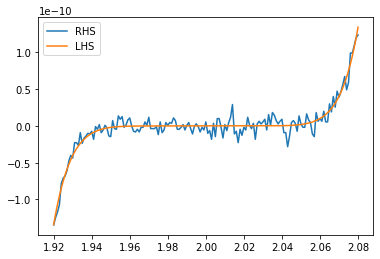

In [10]:
fig, ax1 = plt.subplots(1)
ax1.plot(xs,y1,label='RHS')
ax1.plot(xs,y2,label='LHS')
ax1.legend()


### Question 3: 


### a)

#### The effect of increasing m:

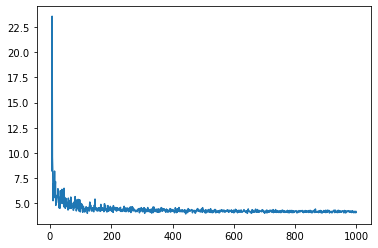

In [14]:
n=5
res=[]
for m in range(6,1000):
    A = np.random.rand(m,n)
    res.append(np.linalg.cond(A))
plt.plot(range(6,1000),res)

#### The effect of increasing n

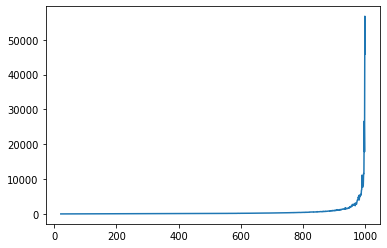

In [7]:
m=1000
res=[]
for n in range(21,1000):
    A = np.random.rand(m,n)
    res.append(np.linalg.cond(A))
plt.plot(range(21,1000),res)

#### The distribution of the conditioning number for a matrix with m=100,n=5

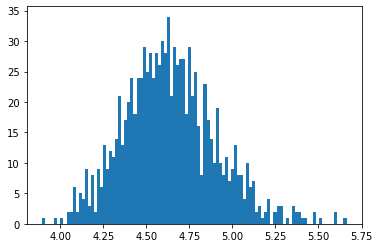

In [28]:
n=5
res=[]
for _ in range(1000):
    A = np.random.rand(100,n)
    res.append(np.linalg.cond(A))
fig,ax = plt.subplots(1)
ax.hist(res,bins=100);

#### The distribution of the conditioning number for a matrix with m=10,n=10

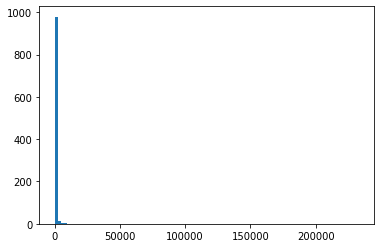

In [29]:
n=10
res=[]
for _ in range(1000):
    A = np.random.rand(10,n)
    res.append(np.linalg.cond(A))
fig,ax = plt.subplots(1)
ax.hist(res,bins=100);

#### Observations:
As m and n getting close to each other, I observe that the distribution of condition number of a randomly generated matrix starts to acquire a long tail. This means that these matricies are more likely to be ill-conditioned. On the other hand, if we keep n constant and keep increasing m, then the matrix starts to be better conditioned. The same is true if m is constant and if we decrease n. From a practical point of view, this means that in a linear regression setting, if we want to get a robust estimate of our coefficients, then we should always have more samples then features. 

### b)

In [2]:
m = 5
n = 3
A = np.random.rand(m,n)
print('Matrix A:\n',A)
print('condition number:',np.linalg.cond(A))

Matrix A:
 [[0.24628191 0.95198691 0.20705759]
 [0.65867716 0.91097776 0.67800675]
 [0.61617548 0.54129391 0.65677914]
 [0.80854108 0.94283147 0.34544031]
 [0.96788225 0.04041287 0.70848236]]
condition number: 8.243357840379547


In [3]:
B = np.zeros(shape=(m,n+1))
B[:,:n] = A
B[:,n] = A[:,0]
print('Matrix B:\n',B)
print('condition number:',np.linalg.cond(B))

Matrix B:
 [[0.24628191 0.95198691 0.20705759 0.24628191]
 [0.65867716 0.91097776 0.67800675 0.65867716]
 [0.61617548 0.54129391 0.65677914 0.61617548]
 [0.80854108 0.94283147 0.34544031 0.80854108]
 [0.96788225 0.04041287 0.70848236 0.96788225]]
condition number: 5.232866251507793e+16


#### Observations:
By adding a duplicate column to the matrix, we create a singular value that is zero, therefore the condition nubmer goes to infinity.

### c)

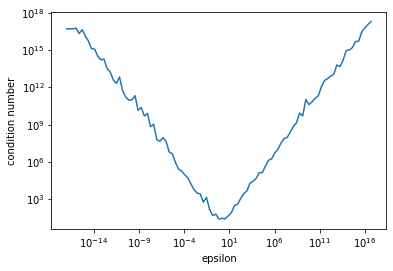

In [22]:
res = []
epsilons = np.logspace(-17,17,100)
for epsilon in epsilons:
    C = B.copy()
    C[:,n][:,np.newaxis] = C[:,n][:,np.newaxis] + epsilon*np.random.rand(m,1)
    res.append(np.linalg.cond(C))
plt.plot(epsilons,res)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('epsilon')
plt.ylabel('condition number');

#### Observations:
The condition number is initially very large. It starts going down as we add a small amount of noise to the last column. As the amount of noise we add increases and starts to have the same order of magnitude as the original column, then essentially the extra column we add becomes independent of the original column and we see the lowest condition number when the epsilon is 1. From this point on, as the amount of noise we add continues to increase condition number starts to increase because the largest singular value starts to increase.

In [2]:
def qrfactor(A):
    m,n = A.shape
    Q = np.eye(m)
    for k in range(n):
        # Find the HH reflector
        print(A)
        print(Q)
        z = A[k:m,k]
        print(z)
        v = np.zeros_like(z)
        v[0] = -np.sign(z[0])*np.linalg.norm(z) - z[0] 
        v[1:] = -z[1:]
        print(v)
        v = v / np.sqrt(np.dot(np.transpose(v),v))
        print(v)
        
        # Apply the HH reflection to each column of A and Q            
        for j in range(n):
            A[k:m,j] = A[k:m,j] - np.multiply(v,( 2*(np.dot(np.transpose(v),A[k:,j])) ))

        for j in range(m):
            Q[k:m,j] = Q[k:m,j] - np.multiply(v,( 2*(np.dot(np.transpose(v),Q[k:m,j]) )))

    return Q.transpose(),np.triu(A)

In [5]:
qrfactor(np.array([[1,2],[3,4],[5,6]]))

[[1 2]
 [3 4]
 [5 6]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[1 3 5]
[-6 -3 -5]
[-0.71713717 -0.35856858 -0.5976143 ]
[[-5 -7]
 [ 0  0]
 [ 0 -1]]
[[-0.02857143 -0.51428571 -0.85714286]
 [-0.51428571  0.74285714 -0.42857143]
 [-0.85714286 -0.42857143  0.28571429]]
[ 0 -1]
[0 1]
[0. 1.]


(array([[-0.02857143, -0.51428571,  0.85714286],
        [-0.51428571,  0.74285714,  0.42857143],
        [-0.85714286, -0.42857143, -0.28571429]]),
 array([[-5, -7],
        [ 0,  0],
        [ 0,  0]]))

In [10]:
A = np.array([[1,2],[3,4],[5,6]])
print(A.shape)
np.linalg.qr(A)

(3, 2)


(array([[-0.16903085,  0.89708523],
        [-0.50709255,  0.27602622],
        [-0.84515425, -0.34503278]]),
 array([[-5.91607978, -7.43735744],
        [ 0.        ,  0.82807867]]))